# Random Forest Experinemtal Set-up

Import packagers and helperf functions:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import json
from sklearn.dummy import DummyRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Fill in the path where you downloaded the project or if the hole folder is open, leave it as it is. 
# Should print what in your folder is.
import os
ROOT_PATH = './'
print(os.listdir(ROOT_PATH))

# supress warnings
import warnings
warnings.filterwarnings('ignore')

['optimization_results.json', 'Exp1_set_up.ipynb']


In [3]:
# set working directory to the root of the project (file slds_stratification)
ROOT_PATH = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification"
os.chdir(ROOT_PATH)
print(os.listdir(ROOT_PATH))

['utils_Nadja.py', '.DS_Store', 'Requirements', '__pycache__', 'README.md', '.gitignore', 'utils.py', 'Simulations', '.ipynb_checkpoints', '.git', '.vscode']


In [4]:
#from Simulations.utils_Nadja import fold_visualizer #Nadja: achtung zweimal helper functions auf verschiednen Ornder Ebenen
from Simulations.utils import FriedmanDataset, run_kfold_visualizer, ModelOptimizer #@Nadja: why cannot import seperatly ?

Set all parameters for experiments:

In [5]:
# Set parameters
# Data Creation
n_train= 1000
n_test= 100000
n_features = 10
FD_noise=0.0

# RandomSearchCV
n_iter= 100
n_repetitions=10

Create training and testing data:

In [6]:
train_log = FriedmanDataset(n_samples=n_train, 
                            n_features=n_features, 
                            noise=FD_noise, 
                            random_state=42)
train_log.transform(transformation='sqrt')

test_log = FriedmanDataset(n_samples=n_test,
                           n_features=n_features,
                           noise=FD_noise,
                           random_state=1718)
test_log.transform(transformation='sqrt')

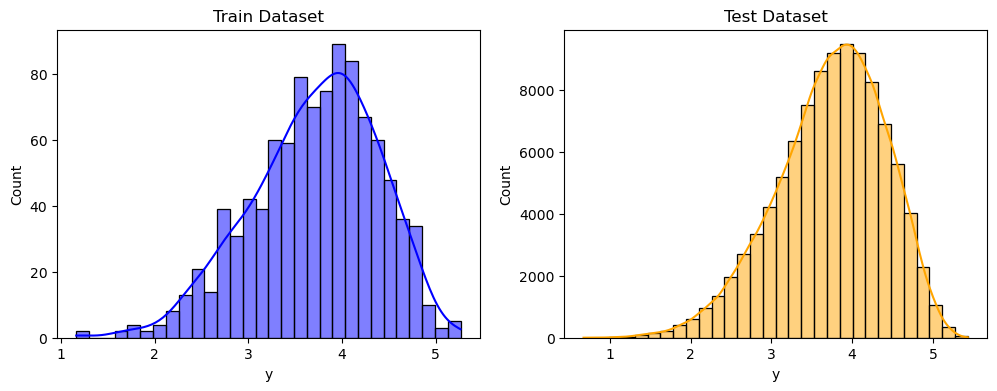

In [7]:
# Show here histograms of train and train datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train_log.df, x='y', bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Train Dataset')

sns.histplot(test_log.df, x='y', bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Test Dataset')

plt.show()

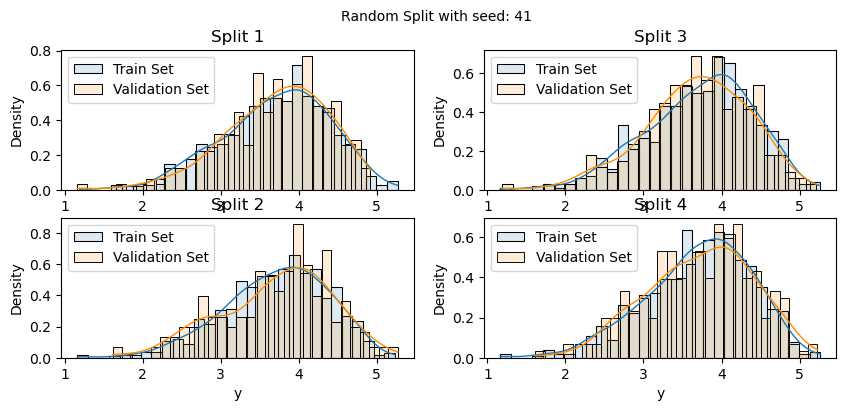

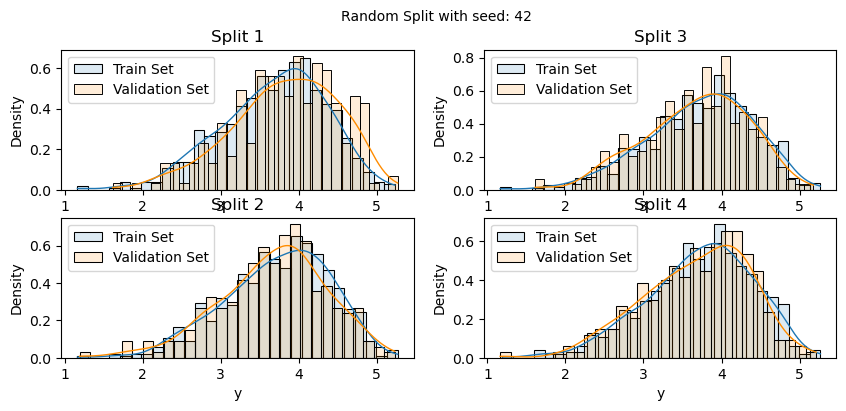

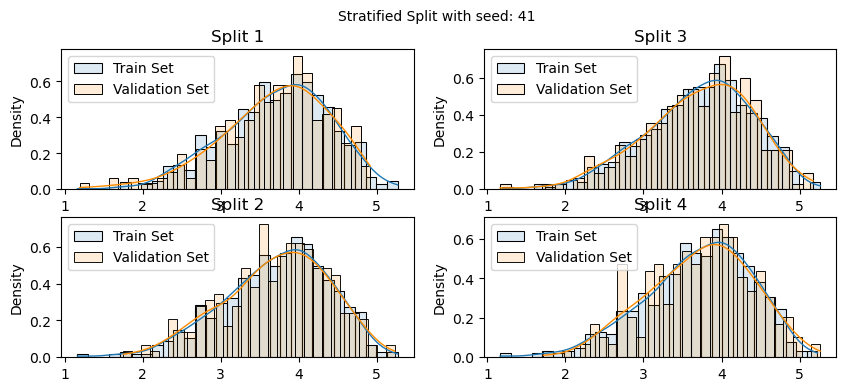

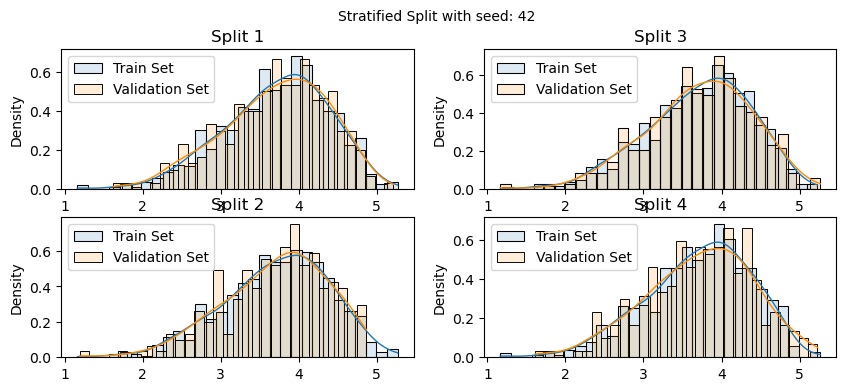

In [8]:
run_kfold_visualizer(labels=train_log.df.y, 
                     k=4,
                     seeds=[41, 42], stratified=False)

run_kfold_visualizer(labels=train_log.y, 
                     k=4,
                     seeds=[41, 42],
                     stratified=True)

Define the parameter grid for random search:

In [9]:
param_rf_log = {
    'n_estimators': np.arange(500, 1001),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, train_log.features.shape[1] + 1)
}

rf_optimizer_log = ModelOptimizer(RandomForestRegressor(random_state=42), param_rf_log)

In [10]:
# set working directory to save file to json
ROOT_PATH = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Experiments1"
os.chdir(ROOT_PATH)
print(os.listdir(ROOT_PATH))

['optimization_results.json', 'RF_log.ipynb']


In [11]:
rf_random_log, rf_stratified_log=rf_optimizer_log.optimize(train_log.features, 
                                                           train_log.y,
                                                           test_log.features,
                                                           test_log.y,
                                                           cv=5, 
                                                           n_groups=20,
                                                           scoring='neg_mean_squared_error', 
                                                           n_jobs=-1,
                                                           n_iter=n_iter,
                                                           transformation='log')

Best Parameters: {'n_estimators': 954, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 2}
Best Parameters: {'n_estimators': 954, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 2}
